<a href="https://colab.research.google.com/github/gnananawin/Energy-consumption-and-Prediction/blob/main/Milestone4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting With ARIMA and Prophet:

# Installing The Required Libraries:

In [1]:
!pip install prophet
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.0 MB/s eta 0:00:00


* We have successfully installed the required libraries.It works on the "Household Power Consumption" dataset to forecast energy consumption.

# Importing the required libraries:

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

* pandas: Used for reading and manipulating the dataset.
* numpy: Provides mathematical functions, including sqrt for RMSE calculation.
* ARIMA: From statsmodels, used for time series forecasting.
* mean_squared_error: From sklearn, calculates the error metric RMSE.

# Importing, Data Cleaning and Data Formating:

In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=00ae61c8-3f2d-484e-8452-71c5e8b5a64a
To: /content/household_power_consumption.txt
100% 133M/133M [00:00<00:00, 214MB/s]


In [4]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=";")
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df.dropna(inplace=True)

<ipython-input-4-b09024b0e19a>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=";")


* Reads the dataset from a .txt file.
* Converts the Global_active_power column to numeric data type.
* Non-numeric values are replaced with NaN using errors='coerce'.
* Drops all rows with missing values to ensure clean data for modeling.

# Indexing Datetime Of The Dataset:

In [5]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

* Combines Date and Time columns into a single Datetime column using pd.to_datetime().
* The format %d/%m/%Y %H:%M:%S ensures proper parsing of day, month, year, hour, minute, and second.
* Sets Datetime as the index, which is necessary for time series analysis.
* Drops the original Date and Time columns after merging them into Datetime.

# ARIMA Model:

In [6]:
train_size = int(len(df) * 0.6)
y_train = df['Global_active_power'][:train_size]
y_test = df['Global_active_power'][train_size:]

In [7]:
model = ARIMA(y_train, order=(5,1,0))
model_fit = model.fit()
predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Root Mean Squared Error (RMSE): 0.9878671161863418


* Splits the dataset into 60% training data and 40% testing data.
* y_train: Contains the first 60% of the Global_active_power column.
* y_test: Contains the remaining 40%.
* Instantiates an ARIMA model with parameters (5,1,0): [p=5: Includes 5 lagged terms in the AR part, d=1: Differencing applied once to make the data stationary, q=0: No moving average terms. ]
* Fits the model to the training data.
* Predicts the values for the test set starting at the end of the training set.
* Calculates RMSE, which measures the average magnitude of the forecast error. Lower values indicate better performance.

# Math Behind ARIMA Model:
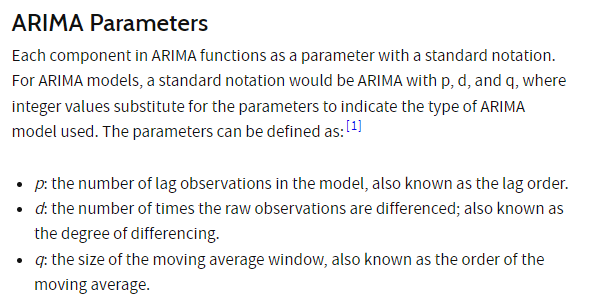



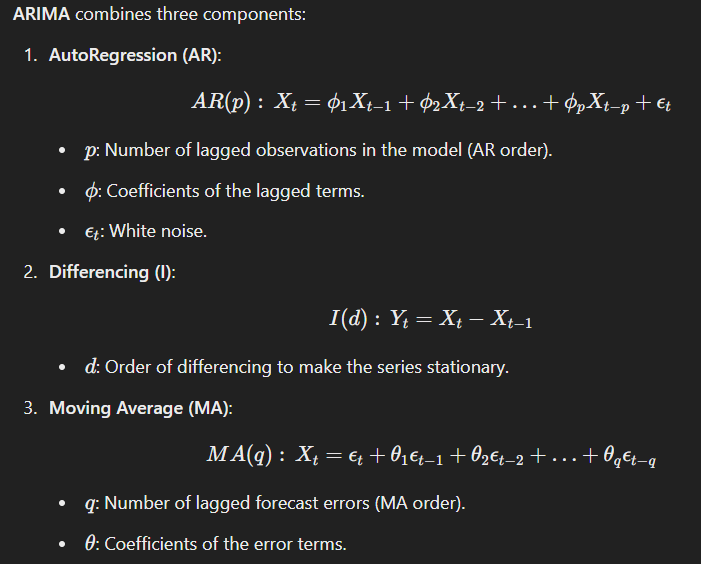

# Prophet Model:

In [8]:
from prophet import Prophet

In [9]:
data = df.copy()
data['ds'] = df.index
data = data.rename(columns={'Global_active_power': 'y'})

In [10]:
train_size_prophet = int(len(data) * 0.8)
train_df = data[:train_size_prophet]
test_df = data[train_size_prophet:]

In [11]:
prophet_model = Prophet()
prophet_model.fit(train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmonbwg_l/1_3_m8xc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmonbwg_l/hymotudl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99934', 'data', 'file=/tmp/tmpmonbwg_l/1_3_m8xc.json', 'init=/tmp/tmpmonbwg_l/hymotudl.json', 'output', 'file=/tmp/tmpmonbwg_l/prophet_modelygcqb9sq/prophet_model-20241123195922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:59:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:18:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future_dates_7days = prophet_model.make_future_dataframe(periods=7 * 24, freq='H')
future_dates_30days = prophet_model.make_future_dataframe(periods=30 * 24, freq='H')

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [13]:
prophet_predictions_7days = prophet_model.predict(future_dates_7days)
prophet_predictions_30days = prophet_model.predict(future_dates_30days)

* Creates a copy of the original dataset.
* Splits the dataset into 80% training and 20% testing data for Prophet.
* Initializes the Prophet model without additional parameters (default settings).
* Fits the model to the training data (train_df).
* Creates the future Dataframe predictions: 7 Days and 30 Days Prediction.

# Visualization:

* Plots the 7-day forecast along with confidence intervals.

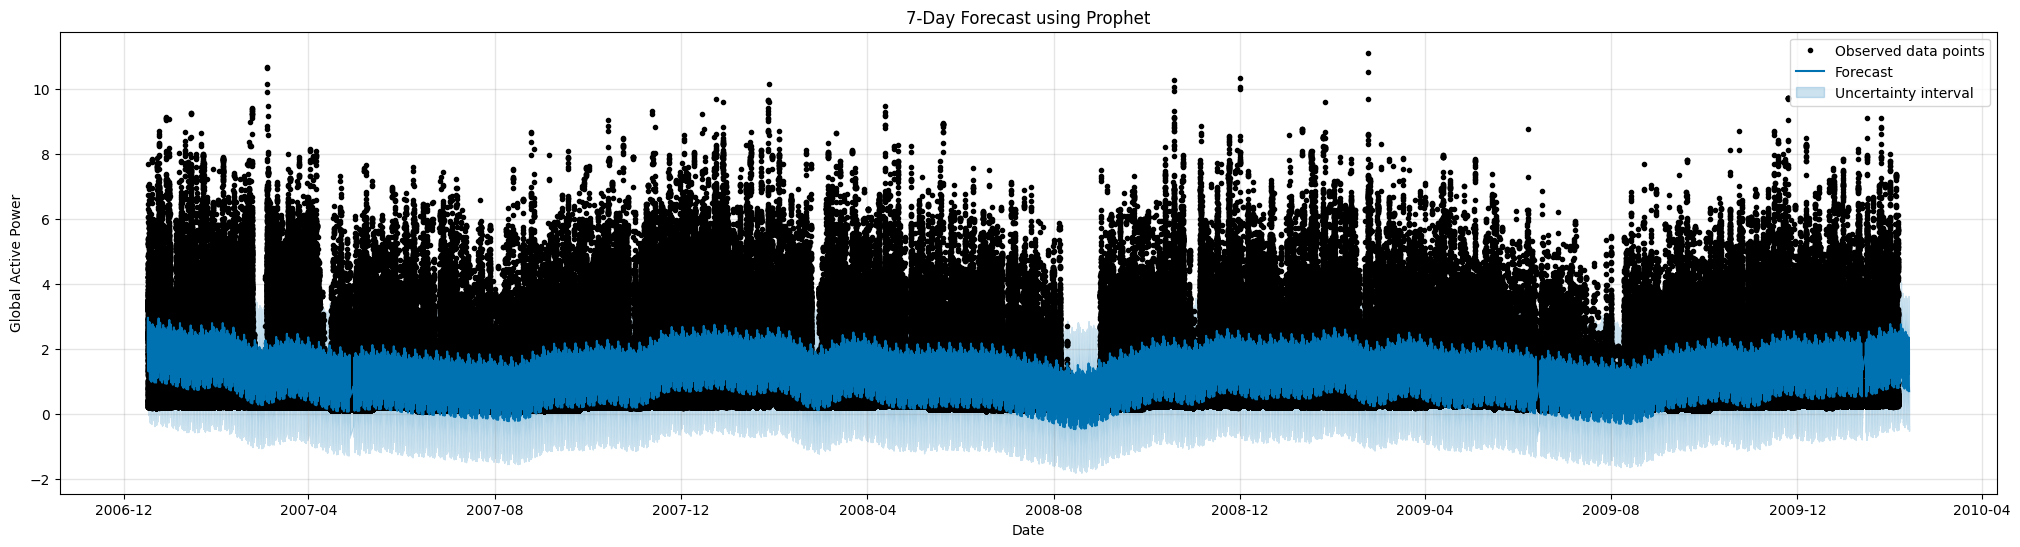

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 6))
prophet_model.plot(prophet_predictions_7days, ax=ax)
plt.title('7-Day Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

* Plots the 30-day forecast with similar labels and intervals.

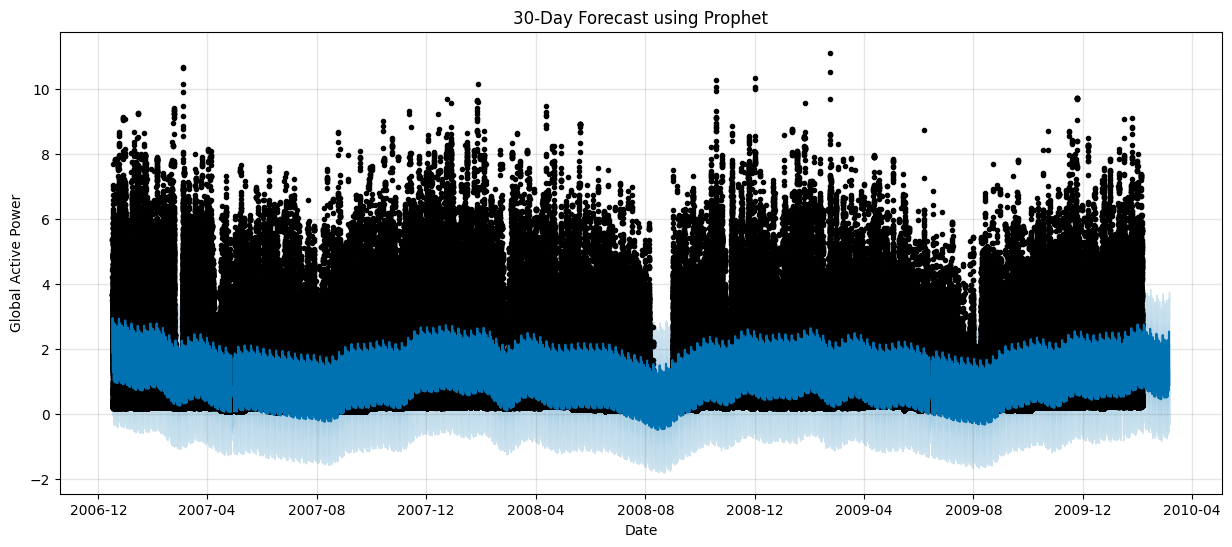

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
prophet_model.plot(prophet_predictions_30days, ax=ax)
plt.title('30-Day Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.show()

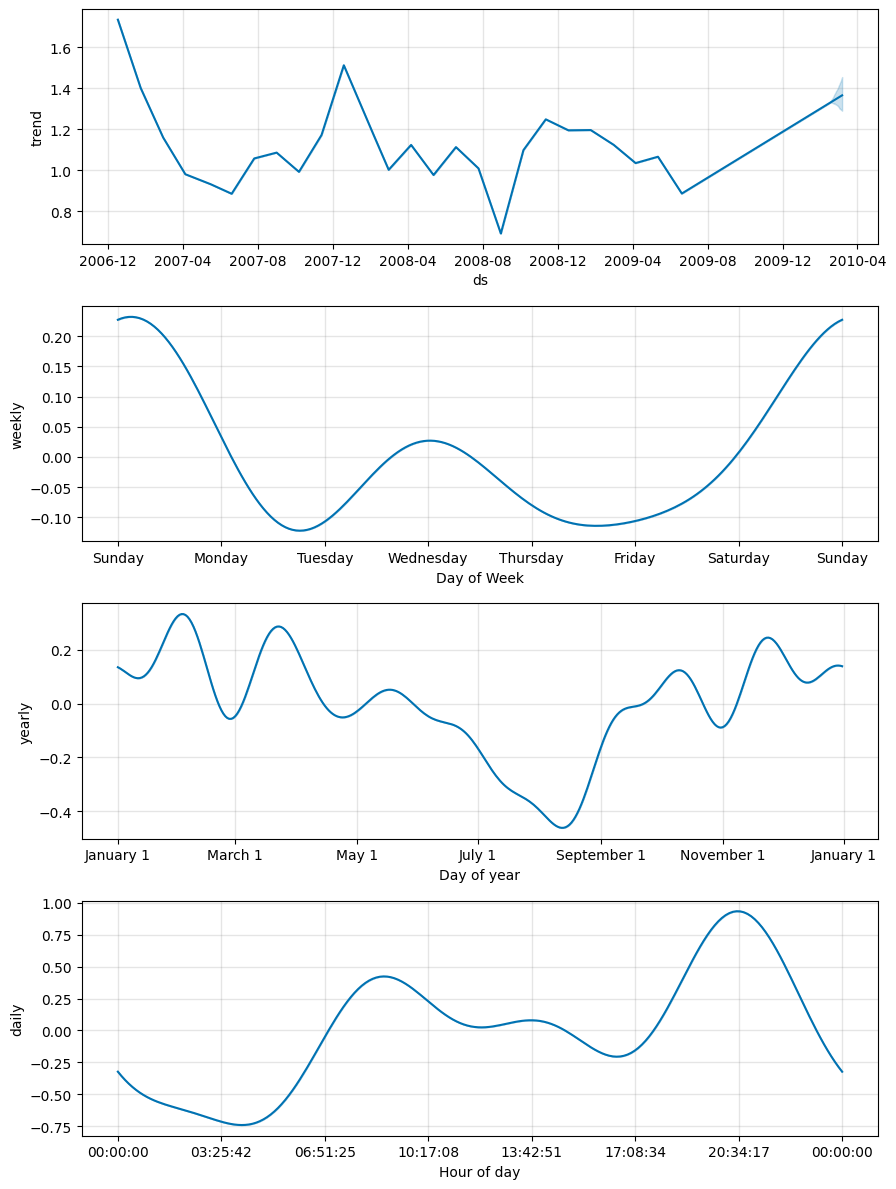

In [16]:
prophet_model.plot_components(prophet_predictions_30days);

* Component analysis in Prophet helps break down the time series forecast into its fundamental building blocks—trend, seasonality, and any added holidays or events. It is particularly valuable for understanding the underlying patterns in the data and making the forecasts interpretable.

# Observations on Prophet Component Analysis:
* Trend:

    The global trend represents the long-term behavior of energy consumption.
Example: A steady increase or decrease could indicate rising or falling usage over time.
* Seasonality:

    Weekly Patterns: Energy usage typically peaks during specific times (e.g., weekdays).
    
    Daily Patterns: Variations in energy consumption across different hours of the day.